# Projet Machine Learning 2

* **Classe :** 4DS2
* **Membres de l'équipe :**
* Ben Mhanna Koussay
* Ben Nacer Chayma
* Lazreg Mohammed Amine
* Ben Mahmoud mhadheb
* Ben Romdhane Khalil 
* Bouattour Mustapha

## Importation des librairies :

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score
from sklearn.svm import SVR
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.api import Holt,SimpleExpSmoothing,ExponentialSmoothing
from fbprophet import Prophet
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch

## Prétraitement des données :

In [3]:
df=pd.read_csv('covid_19_data.csv')

In [4]:
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [5]:
df.shape

(34538, 8)

In [6]:
df.dtypes

SNo                  int64
ObservationDate     object
Province/State      object
Country/Region      object
Last Update         object
Confirmed          float64
Deaths             float64
Recovered          float64
dtype: object

In [7]:
df.groupby(['Country/Region']).size().sort_values(ascending=False)

Country/Region
US                     5860
Mainland China         4152
Canada                 1302
France                  917
Australia               908
                       ... 
St. Martin                1
Republic of Ireland       1
East Timor                1
Channel Islands           1
 Azerbaijan               1
Length: 223, dtype: int64

In [8]:
df.isna().sum()

SNo                    0
ObservationDate        0
Province/State     16474
Country/Region         0
Last Update            0
Confirmed              0
Deaths                 0
Recovered              0
dtype: int64

##### =>On va éliminer les colonnes SNo,Last Update (inutiles) et Province/State (16474 Valeurs nulls ) 

In [9]:
df=df.drop(['SNo','Province/State','Last Update'],axis=1)

In [10]:
df.isna().sum()

ObservationDate    0
Country/Region     0
Confirmed          0
Deaths             0
Recovered          0
dtype: int64

In [11]:
#Convert Observation Date into Datetime
df["ObservationDate"]=pd.to_datetime(df["ObservationDate"])

In [12]:
df.dtypes

ObservationDate    datetime64[ns]
Country/Region             object
Confirmed                 float64
Deaths                    float64
Recovered                 float64
dtype: object

* Convertion des colonnes Confirmed,Deaths,Recovered en int

In [13]:
df["Confirmed"] = df["Confirmed"].astype(float).astype(int)
df["Deaths"] = df["Deaths"].astype(float).astype(int)
df["Recovered"] = df["Recovered"].astype(float).astype(int)

* Regroupement des données par Région et par date

In [14]:
Country_Region=df.groupby(["Country/Region","ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})

In [15]:
Country_Region.head()

Confirmed  Recovered  Deaths
Country/Region  ObservationDate                              
 Azerbaijan     2020-02-28               1          0       0
('St. Martin',) 2020-03-10               2          0       0
Afghanistan     2020-02-24               1          0       0
                2020-02-25               1          0       0
                2020-02-26               1          0       0

* Regroupement des données par date


In [16]:
date_df=df.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})

In [17]:
date_df

,Confirmed,Recovered,Deaths
ObservationDate,,,
2020-01-22,555,28,17
2020-01-23,653,30,18
2020-01-24,941,36,26
2020-01-25,1438,39,42
2020-01-26,2118,52,56
...,...,...,...
2020-05-30,6059017,2564693,369126
2020-05-31,6166946,2641329,372035
2020-06-01,6265852,2696009,375543


## Visualisation des données pour le monde entier  :

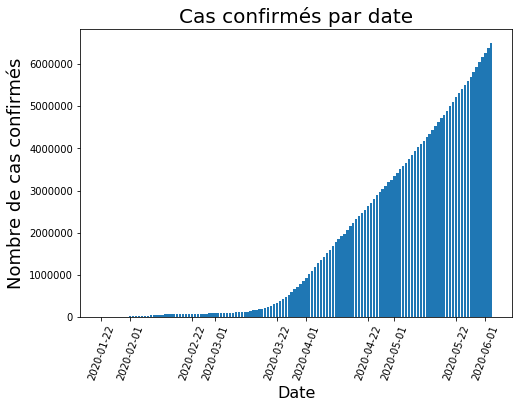

In [18]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.bar(date_df.index,date_df['Confirmed'])
plt.title('Cas confirmés par date',fontsize=20)
plt.xticks(rotation=70)
plt.ylabel('Nombre de cas confirmés', fontsize=18)
plt.xlabel('Date', fontsize=16)

plt.show()

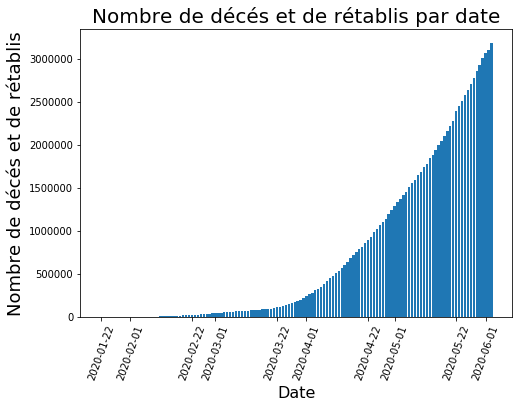

In [19]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.bar(date_df.index,date_df['Recovered']+date_df['Deaths'])
plt.title('Nombre de décés et de rétablis par date',fontsize=20)
plt.xticks(rotation=70)
plt.ylabel('Nombre de décés et de rétablis', fontsize=18)
plt.xlabel('Date', fontsize=16)

plt.show()

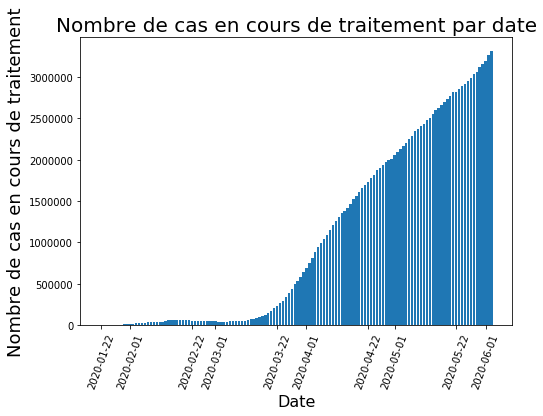

In [20]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.bar(date_df.index,date_df['Confirmed']-date_df['Recovered']-date_df['Deaths'])
plt.title('Nombre de cas en cours de traitement par date',fontsize=20)
plt.xticks(rotation=70)
plt.ylabel('Nombre de cas en cours de traitement', fontsize=18)
plt.xlabel('Date', fontsize=16)

plt.show()

Text(0.5, 0, 'Date')

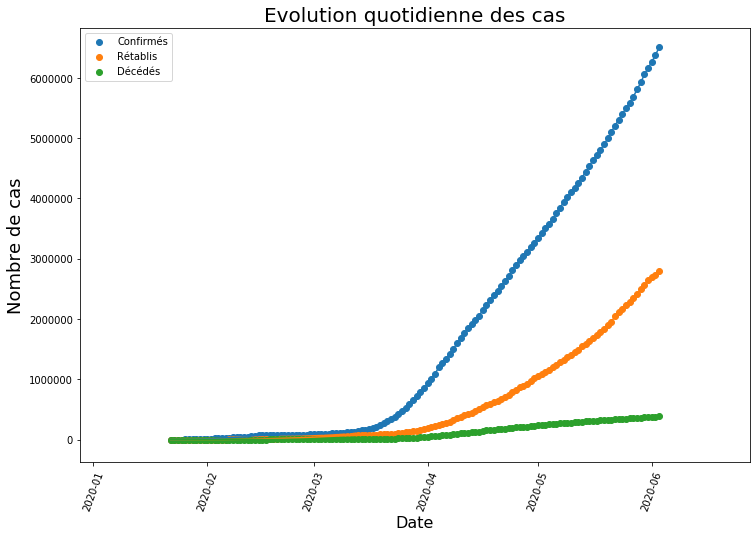

In [21]:
plt.figure(figsize=(12,8))
plt.scatter(date_df.index, date_df["Confirmed"],label='Confirmés')
plt.plot(date_df.index, date_df["Confirmed"])

plt.scatter(date_df.index, date_df["Recovered"],label='Rétablis')
plt.plot(date_df.index, date_df["Recovered"])

plt.scatter(date_df.index, date_df["Deaths"],label='Décédés')
plt.plot(date_df.index, date_df["Deaths"])
plt.legend(loc='best')

plt.title('Evolution quotidienne des cas',fontsize=20)
plt.xticks(rotation=70)
plt.ylabel('Nombre de cas', fontsize=18)
plt.xlabel('Date', fontsize=16)

Text(0.5, 0, 'Date')

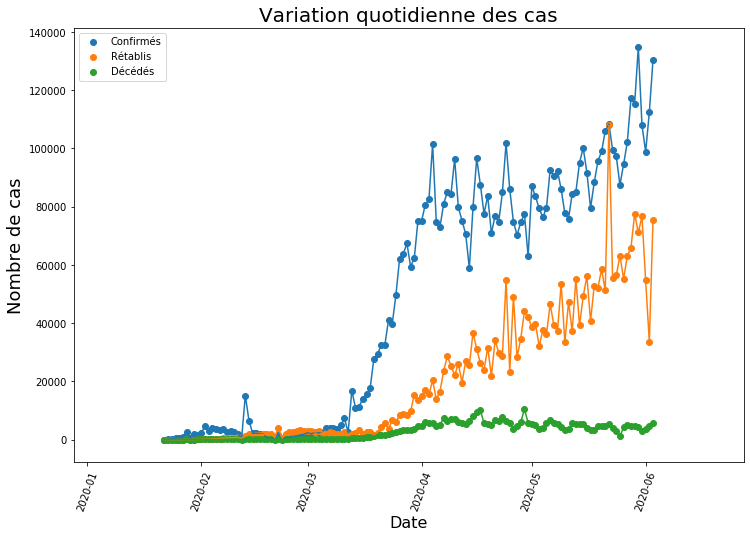

In [22]:
plt.figure(figsize=(12,8))
plt.scatter(date_df.index, date_df["Confirmed"].diff().fillna(0),label='Confirmés')
plt.plot(date_df.index, date_df["Confirmed"].diff().fillna(0))

plt.scatter(date_df.index, date_df["Recovered"].diff().fillna(0),label='Rétablis')
plt.plot(date_df.index, date_df["Recovered"].diff().fillna(0))

plt.scatter(date_df.index, date_df["Deaths"].diff().fillna(0),label='Décédés')
plt.plot(date_df.index, date_df["Deaths"].diff().fillna(0))
plt.legend(loc='best')

plt.title('Variation quotidienne des cas',fontsize=20)
plt.xticks(rotation=70)
plt.ylabel('Nombre de cas', fontsize=18)
plt.xlabel('Date', fontsize=16)

Text(0.5, 0, 'Date')

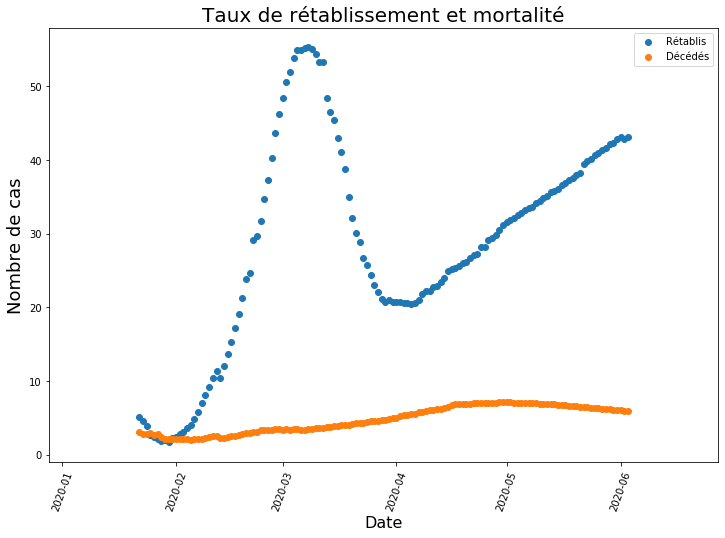

In [23]:
plt.figure(figsize=(12,8))
plt.scatter(date_df.index, 100*date_df["Recovered"]/date_df["Confirmed"],label='Rétablis')


plt.scatter(date_df.index, 100*date_df["Deaths"]/date_df["Confirmed"],label='Décédés')
plt.legend(loc='best')

plt.title('Taux de rétablissement et mortalité',fontsize=20)
plt.xticks(rotation=70)
plt.ylabel('Nombre de cas', fontsize=18)
plt.xlabel('Date', fontsize=16)

Text(0.5, 0, 'Date')

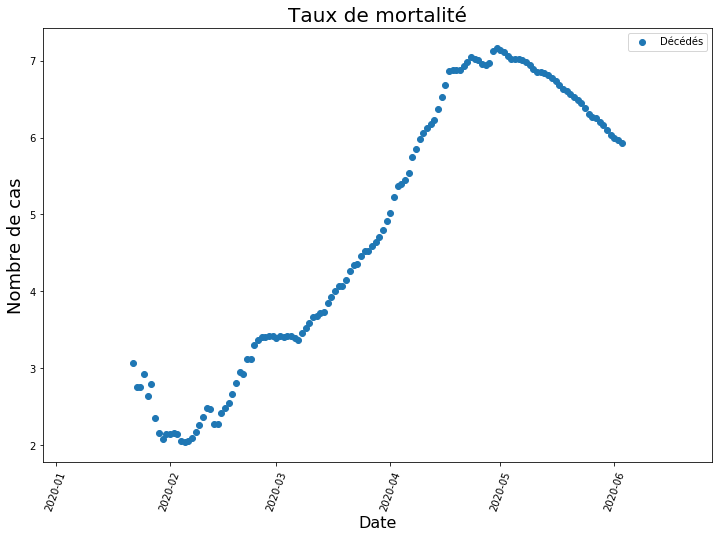

In [24]:
plt.figure(figsize=(12,8))


plt.scatter(date_df.index, 100*date_df["Deaths"]/date_df["Confirmed"],label='Décédés')
plt.legend(loc='best')

plt.title('Taux de mortalité',fontsize=20)
plt.xticks(rotation=70)
plt.ylabel('Nombre de cas', fontsize=18)
plt.xlabel('Date', fontsize=16)

### Maintenant on va s'intéresser aux cas de l'USA :

In [25]:
data_usa=df[df["Country/Region"]=="US"]
date_usa=data_usa.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})

In [26]:
date_usa.head()

,Confirmed,Recovered,Deaths
ObservationDate,,,
2020-01-22,1,0,0
2020-01-23,1,0,0
2020-01-24,2,0,0
2020-01-25,2,0,0
2020-01-26,5,0,0


Text(0.5, 0, 'Date')

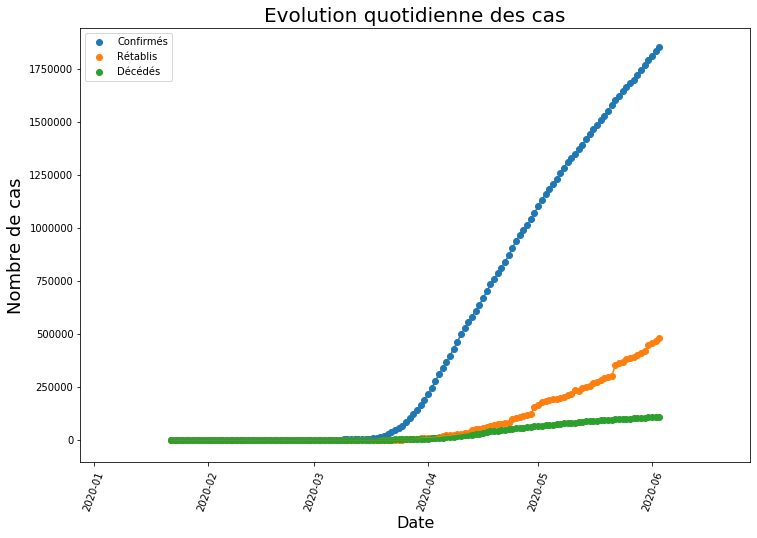

In [27]:
plt.figure(figsize=(12,8))
plt.scatter(date_df.index, date_usa["Confirmed"],label='Confirmés')
plt.plot(date_df.index, date_usa["Confirmed"])

plt.scatter(date_df.index, date_usa["Recovered"],label='Rétablis')
plt.plot(date_df.index, date_usa["Recovered"])

plt.scatter(date_df.index, date_usa["Deaths"],label='Décédés')
plt.plot(date_df.index, date_usa["Deaths"])
plt.legend(loc='best')

plt.title('Evolution quotidienne des cas',fontsize=20)
plt.xticks(rotation=70)
plt.ylabel('Nombre de cas', fontsize=18)
plt.xlabel('Date', fontsize=16)

Text(0.5, 0, 'Date')

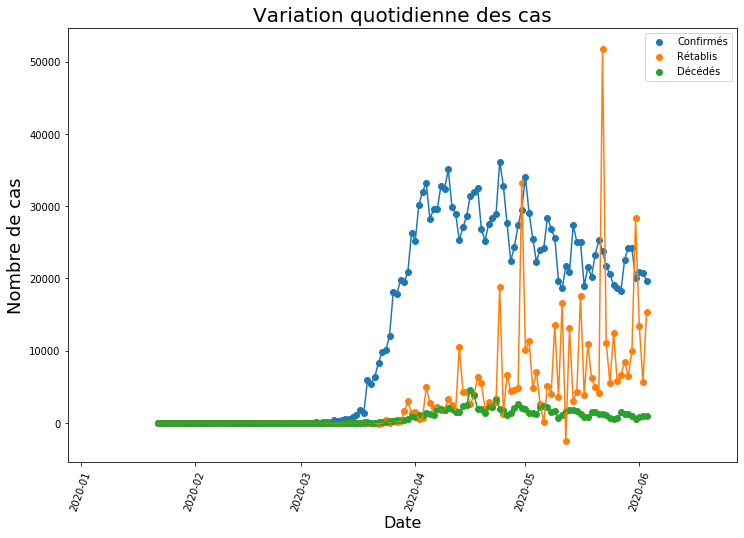

In [28]:
plt.figure(figsize=(12,8))
plt.scatter(date_df.index, date_usa["Confirmed"].diff().fillna(0),label='Confirmés')
plt.plot(date_df.index, date_usa["Confirmed"].diff().fillna(0))

plt.scatter(date_df.index, date_usa["Recovered"].diff().fillna(0),label='Rétablis')
plt.plot(date_df.index, date_usa["Recovered"].diff().fillna(0))

plt.scatter(date_df.index, date_usa["Deaths"].diff().fillna(0),label='Décédés')
plt.plot(date_df.index, date_usa["Deaths"].diff().fillna(0))
plt.legend(loc='best')

plt.title('Variation quotidienne des cas',fontsize=20)
plt.xticks(rotation=70)
plt.ylabel('Nombre de cas', fontsize=18)
plt.xlabel('Date', fontsize=16)

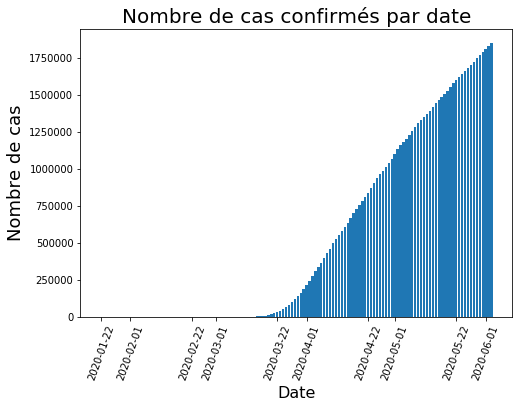

In [29]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.bar(date_usa.index,date_usa['Confirmed'])
plt.title('Nombre de cas confirmés par date',fontsize=20)
plt.xticks(rotation=70)
plt.ylabel('Nombre de cas', fontsize=18)
plt.xlabel('Date', fontsize=16)

plt.show()

## Maintemant on appliquer plusieurs algorithmes de Machine Learning sur les données de monde entier  :

* Régression linéaire 

In [30]:
date_df["Day"]=date_df.index-date_df.index[0]
date_df["Day"]=date_df["Day"].dt.days

In [31]:
date_df.head()

,Confirmed,Recovered,Deaths,Day
ObservationDate,,,,
2020-01-22,555,28,17,0
2020-01-23,653,30,18,1
2020-01-24,941,36,26,2
2020-01-25,1438,39,42,3
2020-01-26,2118,52,56,4


In [32]:
X=date_df['Day'].values.reshape(134,1)
y=date_df['Confirmed'].values.reshape(134,1)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=1) 

In [34]:
lr=LinearRegression(normalize=True)

In [35]:
lr.fit(X_train,y_train)

LinearRegression(normalize=True)

In [36]:
prediction_test=lr.predict(X_test)

In [37]:
mse=np.sqrt(mean_squared_error(y_test,prediction_test))
print("MSE: ",mse)

MSE:  758254.4524036044


Text(0.5, 0, 'Date')

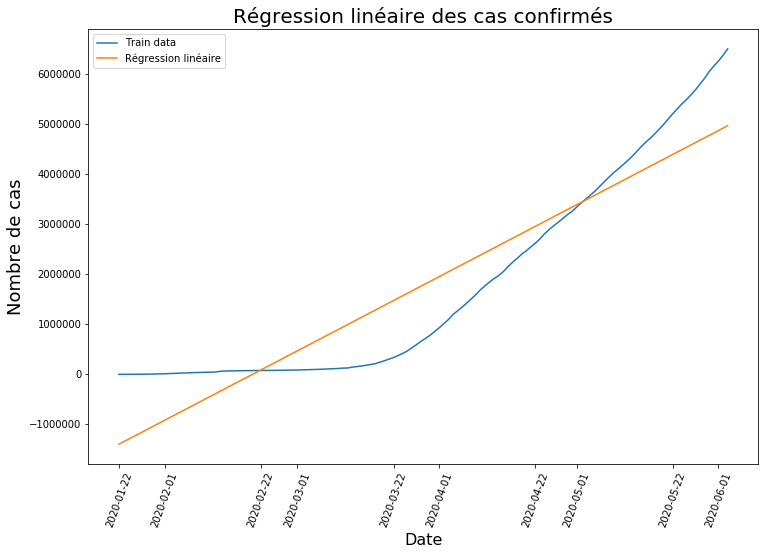

In [38]:
prediction=lr.predict(date_df["Day"].values.reshape(134,1))
lr_results=[]
for i in range(prediction.shape[0]):
    lr_results.append(prediction[i][0])


plt.figure(figsize=(12,8))
plt.plot(date_df.index, date_df["Confirmed"],label='Train data ')
plt.plot(date_df.index, lr_results,label='Régression linéaire')


plt.legend(loc='best')

plt.title('Régression linéaire des cas confirmés',fontsize=20)
plt.xticks(rotation=70)
plt.ylabel('Nombre de cas', fontsize=18)
plt.xlabel('Date', fontsize=16)

* Régression polynomiale : 

In [39]:
poly = PolynomialFeatures(degree = 4) 

In [40]:
X_train_poly=poly.fit_transform(X_train)
X_test_poly=poly.fit_transform(X_test)
y_poly=y_train

In [41]:
lr_poly=LinearRegression(normalize=True)
lr_poly.fit(X_train_poly,y_poly)

LinearRegression(normalize=True)

In [42]:
prediction_poly=lr_poly.predict(X_test_poly)
mse_poly=np.sqrt(mean_squared_error(y_test,prediction_poly))
print("MSE: ",mse_poly)

MSE:  99966.56152415929


In [43]:
prediction_polyy=lr_poly.predict(X_train_poly)


Text(0.5, 0, 'Date')

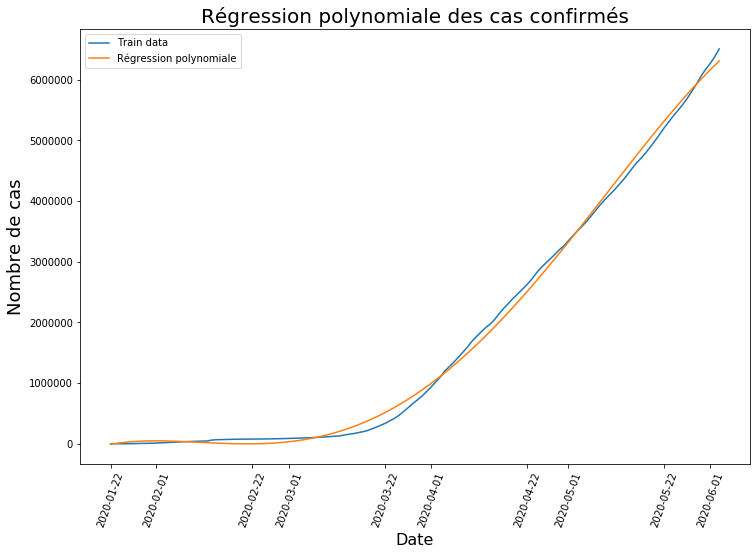

In [44]:
transf_poly=poly.fit_transform(date_df["Day"].values.reshape(134,1))
predictions_poly=lr_poly.predict(transf_poly)


plt.figure(figsize=(12,8))
plt.plot(date_df.index, date_df["Confirmed"],label='Train data')
plt.plot(date_df.index, predictions_poly,label='Régression polynomiale')


plt.legend(loc='best')

plt.title('Régression polynomiale des cas confirmés',fontsize=20)
plt.xticks(rotation=70)
plt.ylabel('Nombre de cas', fontsize=18)
plt.xlabel('Date', fontsize=16)

* Régression SVM : 

In [45]:
svm=SVR(C=1,degree=5,kernel='poly',epsilon=0.01)

In [46]:
svm.fit(X_train,y_train)

C:\Users\kouss\anaconda3\envs\work\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVR(C=1, degree=5, epsilon=0.01, kernel='poly')

In [47]:
prediction_svm_test=svm.predict(X_test)

In [48]:
mse=np.sqrt(mean_squared_error(y_test,prediction_svm_test))
print("MSE: ",mse)

MSE:  1246993.3129879015


Text(0.5, 0, 'Date')

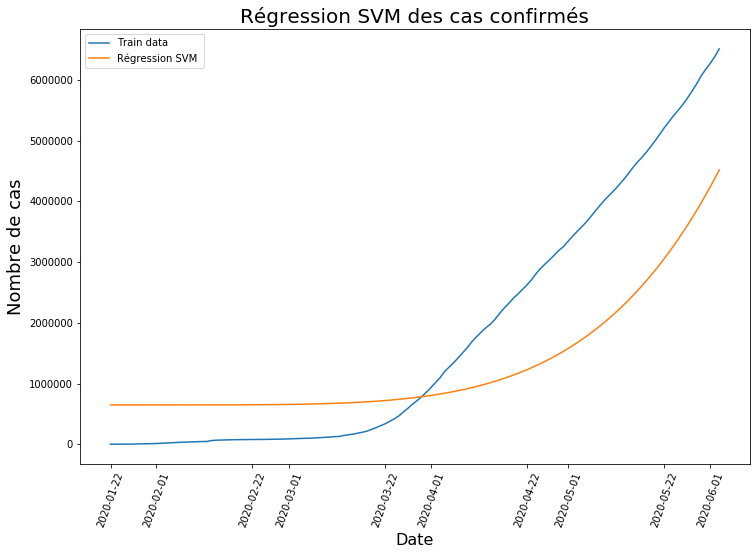

In [49]:
prediction_svm=svm.predict(date_df["Day"].values.reshape(134,1))

plt.figure(figsize=(12,8))
plt.plot(date_df.index, date_df["Confirmed"],label='Train data')
plt.plot(date_df.index, prediction_svm,label='Régression SVM ')

plt.legend(loc='best')

plt.title('Régression SVM des cas confirmés',fontsize=20)
plt.xticks(rotation=70)
plt.ylabel('Nombre de cas', fontsize=18)
plt.xlabel('Date', fontsize=16)

## Maintemant on appliquer plusieurs algorithmes de Machine Learning sur les données de l' USA :

#### Régession linéaire :

In [50]:
date_usa["Day"]=date_usa.index-date_df.index[0]
date_usa["Day"]=date_usa["Day"].dt.days

In [51]:
date_usa.head()

,Confirmed,Recovered,Deaths,Day
ObservationDate,,,,
2020-01-22,1,0,0,0
2020-01-23,1,0,0,1
2020-01-24,2,0,0,2
2020-01-25,2,0,0,3
2020-01-26,5,0,0,4


In [52]:
X=date_usa['Day'].values.reshape(134,1)
y=date_usa['Confirmed'].values.reshape(134,1)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=1) 

In [54]:
lr=LinearRegression(normalize=True)

In [55]:
lr.fit(X_train,y_train)

LinearRegression(normalize=True)

In [56]:
prediction_test=lr.predict(X_test)

In [57]:
all_scores=[]

In [58]:
mse=np.sqrt(mean_squared_error(y_test,prediction_test))
all_scores.append(mse)
print("MSE: ",mse)

MSE:  254076.54732766812


Text(0.5, 0, 'Date')

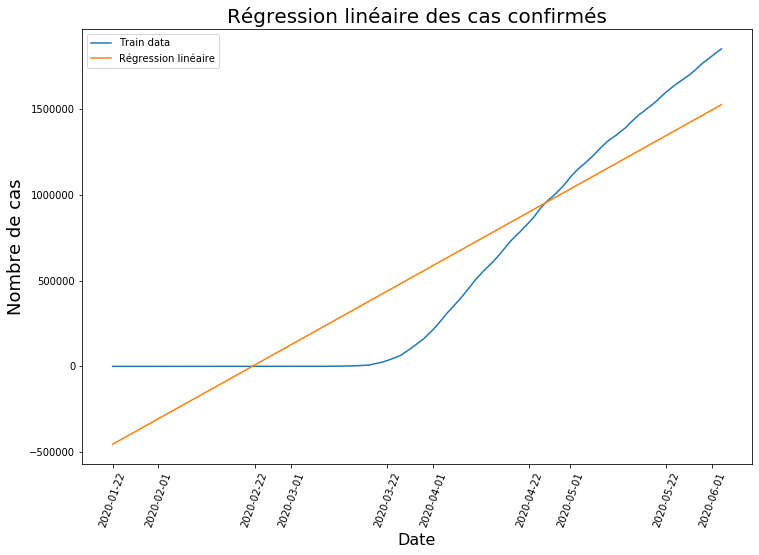

In [59]:
prediction=lr.predict(date_usa["Day"].values.reshape(134,1))
lr_results=[]
for i in range(prediction.shape[0]):
    lr_results.append(prediction[i][0])


plt.figure(figsize=(12,8))
plt.plot(date_usa.index, date_usa["Confirmed"],label='Train data ')
plt.plot(date_usa.index, lr_results,label='Régression linéaire')


plt.legend(loc='best')

plt.title('Régression linéaire des cas confirmés',fontsize=20)
plt.xticks(rotation=70)
plt.ylabel('Nombre de cas', fontsize=18)
plt.xlabel('Date', fontsize=16)

#### Polynom :

In [60]:
poly = PolynomialFeatures(degree = 4) 

In [61]:
X_train_poly=poly.fit_transform(X_train)
X_test_poly=poly.fit_transform(X_test)
y_poly=y_train

In [62]:
lr_poly=LinearRegression(normalize=True)
lr_poly.fit(X_train_poly,y_poly)

LinearRegression(normalize=True)

In [63]:
prediction_poly=lr_poly.predict(X_test_poly)
mse_poly=np.sqrt(mean_squared_error(y_test,prediction_poly))
all_scores.append(mse_poly)
print("MSE: ",mse_poly)

MSE:  37169.693685001235


In [64]:

prediction_polyy=lr_poly.predict(X_train_poly)


Text(0.5, 0, 'Date')

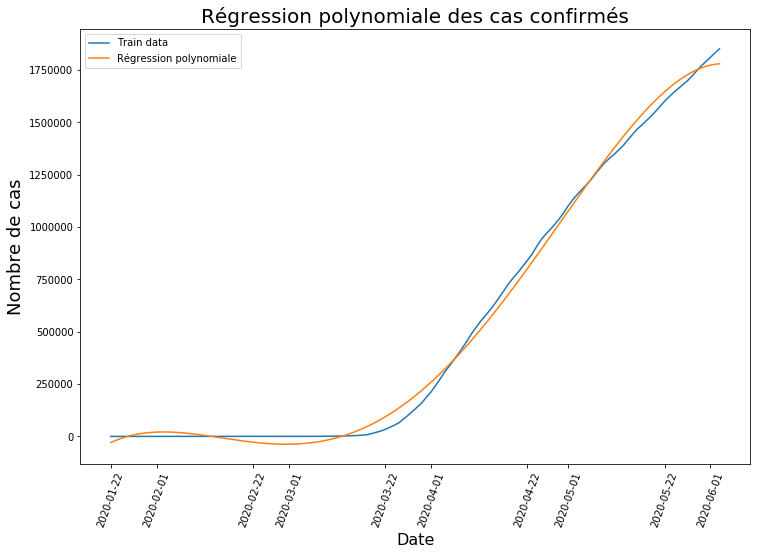

In [65]:
transf_poly=poly.fit_transform(date_usa["Day"].values.reshape(134,1))
predictions_poly=lr_poly.predict(transf_poly)


plt.figure(figsize=(12,8))
plt.plot(date_usa.index, date_usa["Confirmed"],label='Train data')
plt.plot(date_usa.index, predictions_poly,label='Régression polynomiale')


plt.legend(loc='best')

plt.title('Régression polynomiale des cas confirmés',fontsize=20)
plt.xticks(rotation=70)
plt.ylabel('Nombre de cas', fontsize=18)
plt.xlabel('Date', fontsize=16)

#### SVM :

* Ici on va utiliser la régression de l'algorithme SVM

In [66]:
svm=SVR(C=1,degree=5,kernel='poly',epsilon=0.01)

In [67]:
svm.fit(X_train,y_train)

C:\Users\kouss\anaconda3\envs\work\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVR(C=1, degree=5, epsilon=0.01, kernel='poly')

In [68]:
prediction_svm_test=svm.predict(X_test)

In [69]:
mse_svm=np.sqrt(mean_squared_error(y_test,prediction_svm_test))
all_scores.append(mse_svm)
print("MSE: ",mse_svm)

MSE:  275200.54823082476


Text(0.5, 0, 'Date')

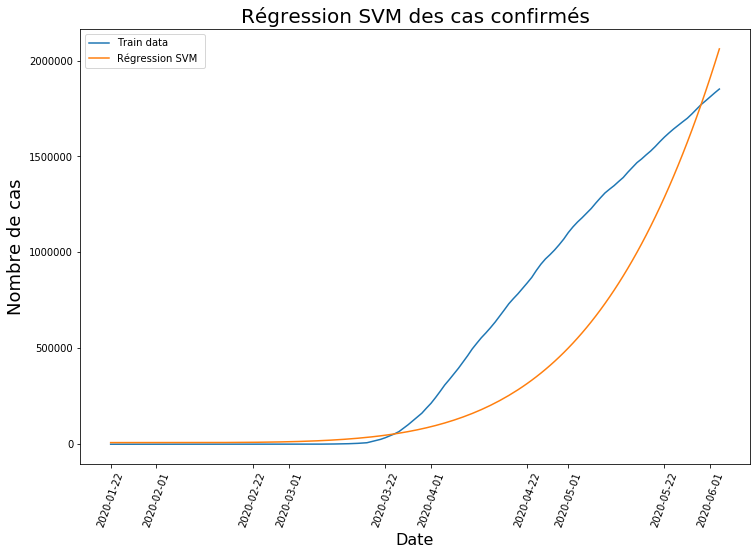

In [70]:
prediction_svm=svm.predict(date_usa["Day"].values.reshape(134,1))

plt.figure(figsize=(12,8))
plt.plot(date_usa.index, date_usa["Confirmed"],label='Train data')
plt.plot(date_usa.index, prediction_svm,label='Régression SVM ')

plt.legend(loc='best')

plt.title('Régression SVM des cas confirmés',fontsize=20)
plt.xticks(rotation=70)
plt.ylabel('Nombre de cas', fontsize=18)
plt.xlabel('Date', fontsize=16)

## Maintemant on appliquer les algorithmes des séries temporelles:

##### fb prophet time series model :

In [71]:
prophet_model=Prophet(interval_width=0.8,weekly_seasonality=True)

In [72]:
y_confirmed=pd.DataFrame(zip(list(date_usa.index),list(date_usa["Confirmed"])),columns=['ds','y'])

In [73]:
prophet_model.fit(y_confirmed)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [74]:
forecasting=prophet_model.make_future_dataframe(periods=15)

In [75]:
confirmed_forecast=prophet_model.predict(forecasting)

In [76]:
mse_prophet=np.sqrt(mean_squared_error(date_usa["Confirmed"],confirmed_forecast['yhat'].head(date_usa.shape[0])))
all_scores.append(mse_prophet)
print('mse: ',mse_prophet)

mse:  2248.416495127068


Figure(720x432)


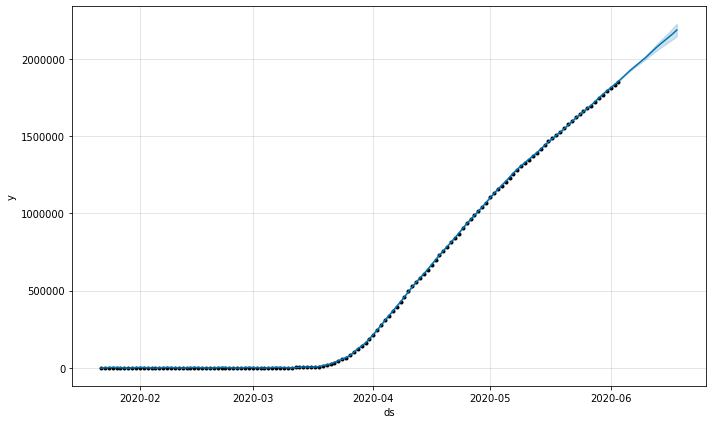

In [77]:
print(prophet_model.plot(confirmed_forecast))

##### Holt's Winter Model

In [78]:
train_es=date_usa.iloc[:int(date_usa.shape[0]*0.9)]
test_es=date_usa.iloc[int(date_usa.shape[0]*0.9):]
pred_es=test_es.copy()

In [79]:
es=ExponentialSmoothing(np.asarray(train_es['Confirmed']),seasonal_periods=7,trend='mul', seasonal='mul').fit()

C:\Users\kouss\anaconda3\envs\work\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\kouss\anaconda3\envs\work\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


In [80]:
y_pred_es=es.forecast(len(test_es))

In [81]:
mse_es=np.sqrt(mean_squared_error(test_es['Confirmed'],y_pred_es))
all_scores.append(mse_es)
print('mse : ',mse_es)

mse :  40458.68304407429


Text(0.5, 0, 'Date')

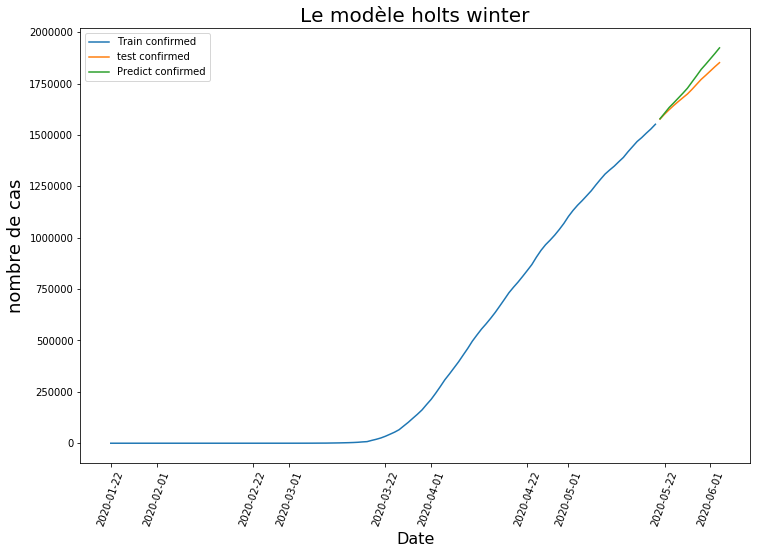

In [82]:
plt.figure(figsize=(12,8))
plt.plot(train_es.index, train_es['Confirmed'],label='Train confirmed')

plt.plot(test_es.index, test_es['Confirmed'],label='test confirmed')


plt.plot(test_es.index, y_pred_es,label='Predict confirmed')

plt.legend(loc='best')

plt.title('Le modèle holts winter',fontsize=20)
plt.xticks(rotation=70)
plt.ylabel('nombre de cas', fontsize=18)
plt.xlabel('Date', fontsize=16)

## Maintenant on va comparer les scores des modèles :

In [83]:
models_scores=pd.DataFrame(zip(['Linear regression','Polynomial regression','SVM','Prophet','Holt Winter'],all_scores),columns=["Models","Mean Squared Error"])
models_scores

,Models,Mean Squared Error
0,Linear regression,254076.547328
1,Polynomial regression,37169.693685
2,SVM,275200.548231
3,Prophet,2248.416495
4,Holt Winter,40458.683044


In [84]:
models_scores.sort_values(by="Mean Squared Error")

,Models,Mean Squared Error
3,Prophet,2248.416495
1,Polynomial regression,37169.693685
4,Holt Winter,40458.683044
0,Linear regression,254076.547328
2,SVM,275200.548231


#### => Selon les scores le meilleur modèle est prophet et le pire est SVM


## Clustering :

In [85]:
df_country=df[df["ObservationDate"]==df["ObservationDate"].max()].groupby(["Country/Region"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'}).sort_values(["Confirmed"],ascending=False)

In [86]:
country=df_country.copy()
del country['Confirmed']

In [87]:
country

,Recovered,Deaths
Country/Region,,
US,479258,107175
Brazil,238617,32548
Russia,195559,5208
UK,1212,39811
Spain,150376,27128
...,...,...
Seychelles,11,0
MS Zaandam,0,2
Western Sahara,6,1


In [88]:
#k-means 
l=[]
K=range(1,10)
for i in K:
    kmeanModel=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeanModel.fit(country)
    labels=kmeanModel.labels_
    centroids=kmeanModel.cluster_centers_
    l.append(kmeanModel.inertia_)

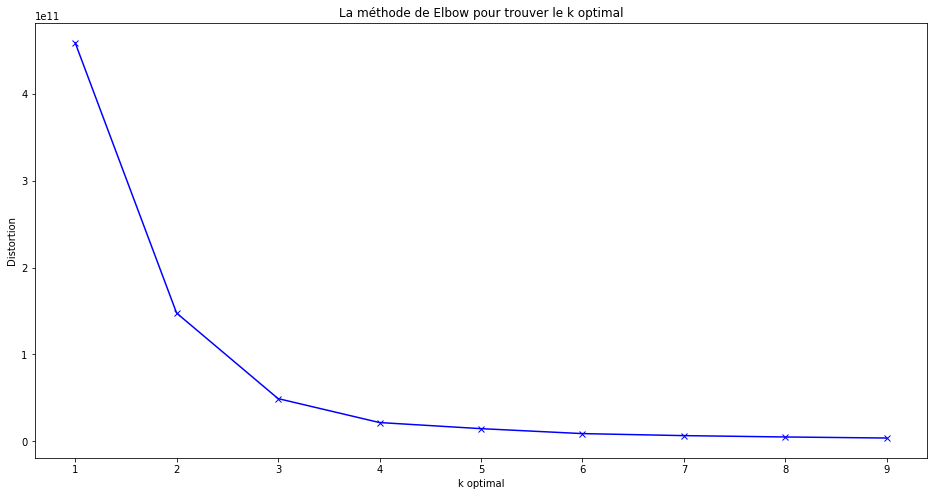

In [89]:
plt.figure(figsize=(16,8))
plt.plot(K, l, 'bx-')
plt.xlabel('k optimal')
plt.ylabel('Distortion')
plt.title('La méthode de Elbow pour trouver le k optimal')
plt.show()

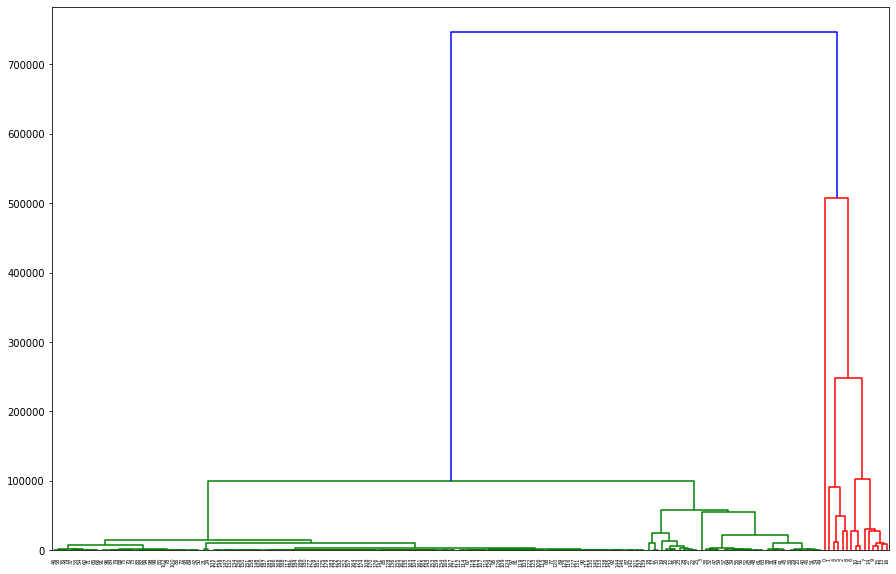

In [90]:
plt.figure(figsize=(15,10))
dendogram=sch.dendrogram(sch.linkage(country, method  = "ward"))

In [91]:
#### 2 clusters for both methods

In [92]:
kMeans_=KMeans(n_clusters=2,init='k-means++')
kMeans_.fit(country)

KMeans(n_clusters=2)

In [93]:
country["Clusters"]=kMeans_.predict(country)

In [94]:
country['Clusters'].value_counts()

0    182
1      8
Name: Clusters, dtype: int64